In [196]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import math

## My x and z function:

In [144]:
# finding in the x direction: (finding y direction will be slightly different)

# x1 and x2 are the x left and x right point of an object in 1 image

def xreal(depth, f, x1, x2, image, FOV):
    h,w,_ = image.shape
    mid = w/2
    
    thetal = ((np.sqrt((mid-x1)**2))/w)*FOV
    thetar = ((np.sqrt((mid-x2)**2))/w)*FOV
              
    xl = f*math.tan(thetal)
    xr = f*math.tan(thetar)
    
    if x2 <= mid:
        print("Used Equation 1 (Object left)")
        xlens = xl-xr
    elif x1 >= mid:
        print("Used Equation 2 (Object right)")
        xlens = xr-xl
    else:
        print("Used Equation 3 (Object centralized)")
        xlens = xl+xr
    
    x = ((depth + f)*xlens)/f
    
    return x

In [145]:
#  this x11 and x12 are the same x point in the left and right image

def zreal(f, b, FOV, x11, x12, image):
    h,w,_ = image.shape
    mid = w/2
    
    thetal = ((np.sqrt((mid-x11)**2))/w)*FOV
    thetar = ((np.sqrt((mid-x12)**2))/w)*FOV
              
    xl = f*math.tan(thetal)
    xr = f*math.tan(thetar)
    
    if x11 <= mid and x12 <= mid:
        print("Used Equation 1 (Point left)")
        x = b + xl - xr
    elif x12 >= mid and x11 >= mid:
        print("Used Equation 2 (Point right)")
        x = b - xl + xr
    else:
        print("Used Equation 3 (Point centralized)")
        x = b - xl - xr
    
    z = f/((b/x)-1)
    
    return z

## Found x and z functions:

In [141]:
def foundz(b, f, x11, x12):
    z = (b*f*190)/(np.sqrt((x11-x12)**2))
    return z

In [142]:
def foundx(f, z, x1, x2):
    x = ((np.sqrt((x1-x2)**2))/(f*210))*z
    return x

## Main:

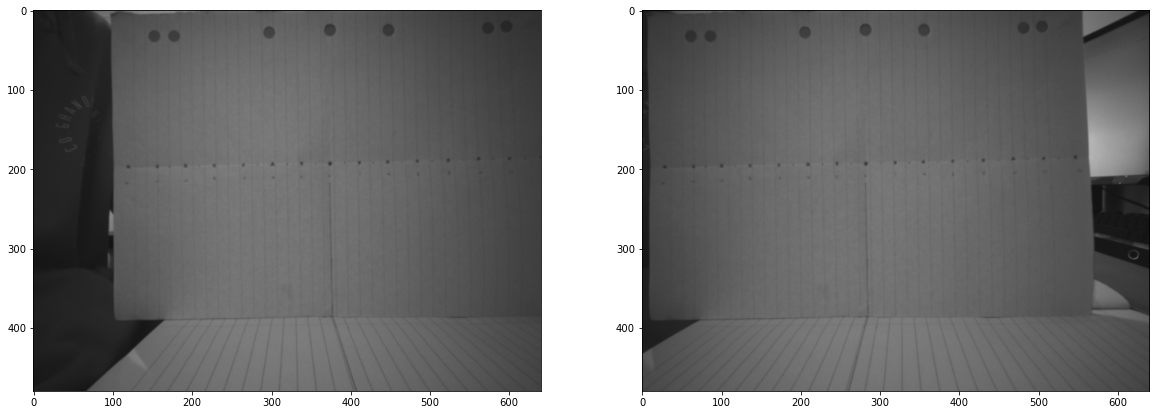

In [146]:
# load images in
pairnumber = 1
imagel = cv2.imread("depth_testing/ImagePair{}-l.png".format(pairnumber))
imager = cv2.imread("depth_testing/ImagePair{}-r.png".format(pairnumber))

fig,ax = plt.subplots(1,2,figsize=(20,20))

ax[0].imshow(imagel)
ax[1].imshow(imager)
plt.show()

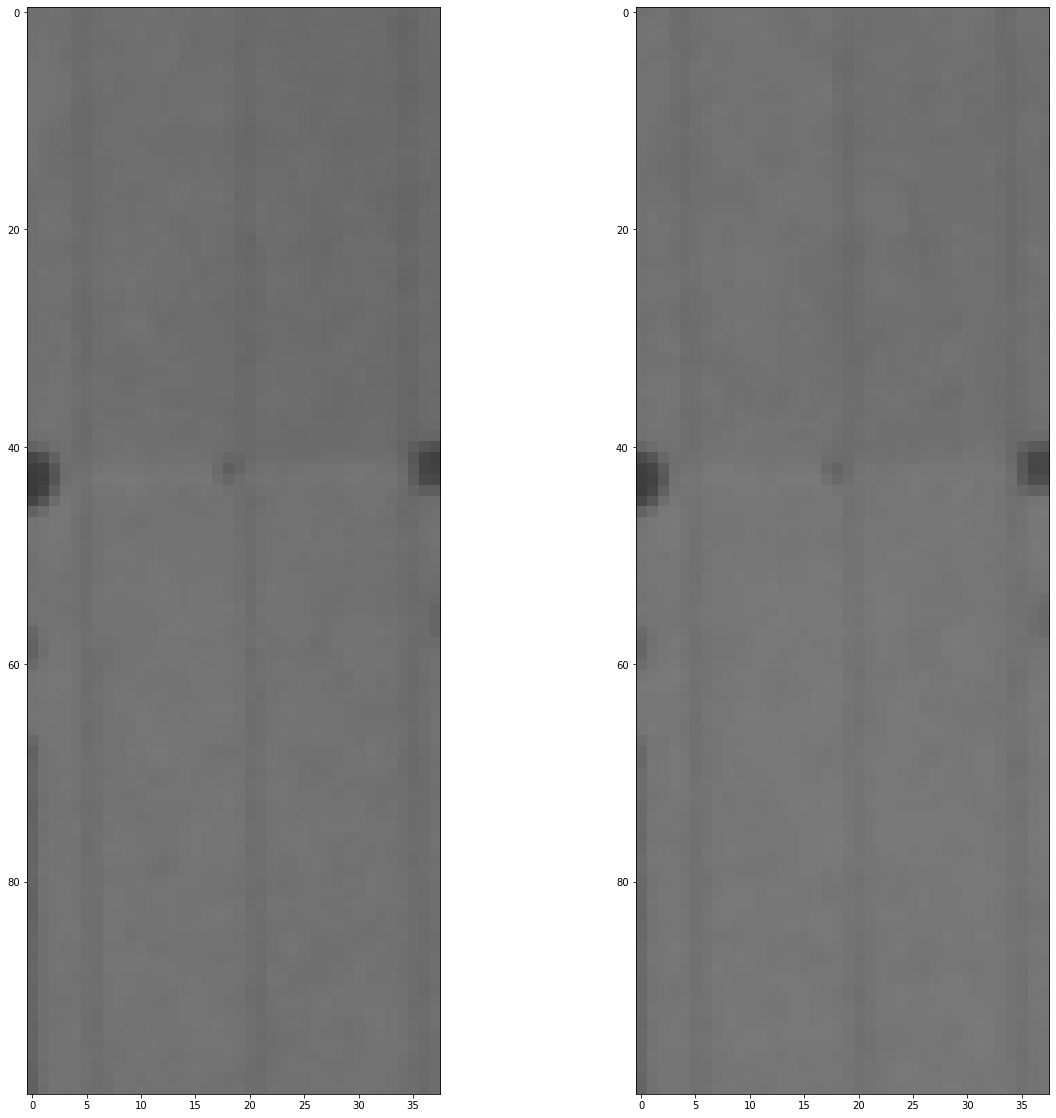

In [184]:
x11 = 374
x12 = 412

x21 = 282
x22 = 320

fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(imagel[150:250,x11:x12])
ax[1].imshow(imager[150:250,x21:x22])
plt.show()

In [185]:
depth = 200
f = 1.93
FOV = 1.59174 # 91.2 degrees
b = 49.9465

In [186]:
# my x
x = xreal(depth, f, x11, x12, imager, FOV)
print(x)

Used Equation 2 (Object right)
19.743669238212696


In [195]:
# my z
z = zreal(f, b, FOV, x12, x22, imager)
print(z)

Used Equation 2 (Point right)
212.53276877919606


In [191]:
# found x
x = foundx(f, depth, x11, x12)
print(x)

18.751542067604245


In [192]:
# found z
z = foundz(b, f, x12, x22)
print(z)

199.08023423913042
